# Problem Statement

## The goal of this project is to make a model that predicts profit for start ups.

In [129]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

In [130]:
#Loading the data i.e., storing the data in a variable as data frame
profit_df = pd.read_csv('50_Startups.csv')
profit_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [131]:
profit_df=profit_df.rename({'R&D Spend':'RD','Administration':'ADM','Marketing Spend':'MKTS'},axis=1)   # Renaming the coloumn Labels
profit_df

,RD,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [132]:
#First we will check if the dataset contains any missing or null values
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   ADM     50 non-null     float64
 2   MKTS    50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [133]:
#calculating the spread of data in State
profit_df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [134]:
profit_df.describe()

,RD,ADM,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [135]:
profit_df.shape

(50, 5)

In [136]:
sns.set(style='white',font_scale=1.3)

In [137]:
profit_df.head()

,RD,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


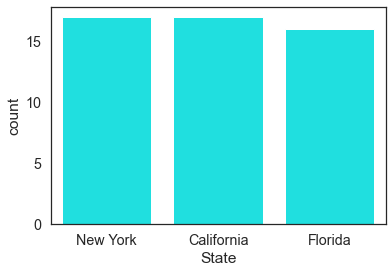

In [138]:
#Bar Chart
sns.countplot(profit_df['State'],color='aqua');

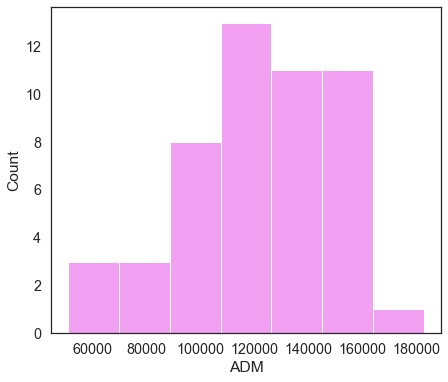

In [139]:
#Histogram for Administration data
plt.figure(figsize=(7,6))
sns.histplot(profit_df['ADM'],color='violet');

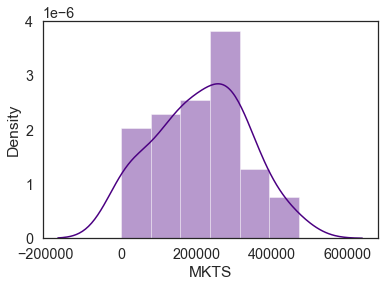

In [140]:
#Now we will check if the data is normally distributed using d distribution plot( this is used for univariate analysis) for feature
sns.distplot(profit_df['MKTS'],color='Indigo');

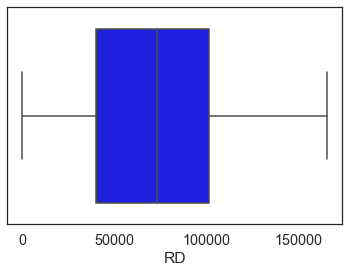

In [141]:
#Check for outliers
sns.boxplot(profit_df['RD'],color='blue',orient="h");

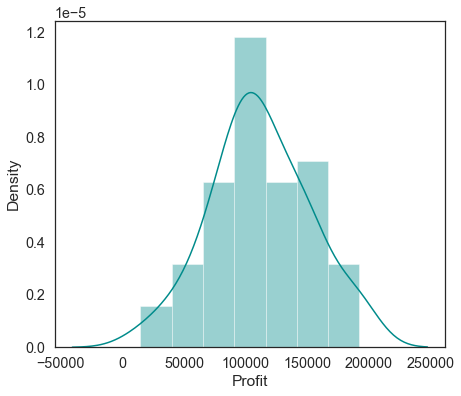

In [142]:
#Now we will check if the data is normally distributed using d distribution plot( this is used for univariate analysis) for target feature
plt.figure(figsize=(7,6))
sns.distplot(profit_df['Profit'],color='darkcyan');

Text(0.5, 1.0, 'Correlation between variables')

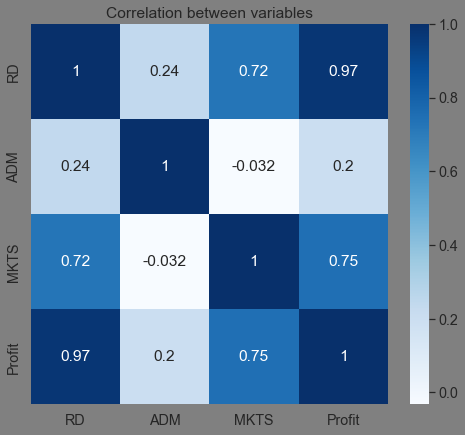

In [143]:
corr=profit_df.corr()
plt.figure(figsize=(8,7),facecolor='grey')
sns.heatmap(corr, cmap="Blues", annot = True)
plt.title("Correlation between variables")

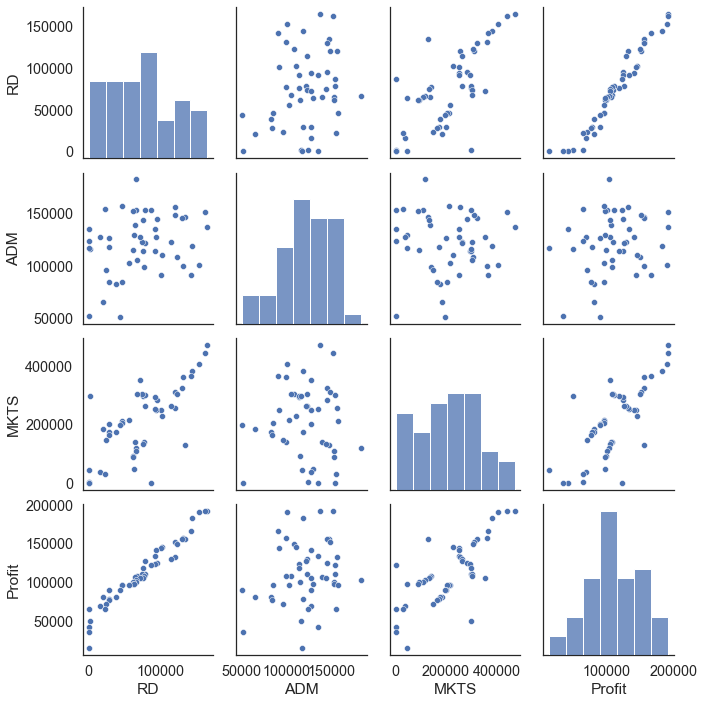

In [144]:
sns.pairplot(profit_df)

<AxesSubplot:xlabel='MKTS', ylabel='Profit'>

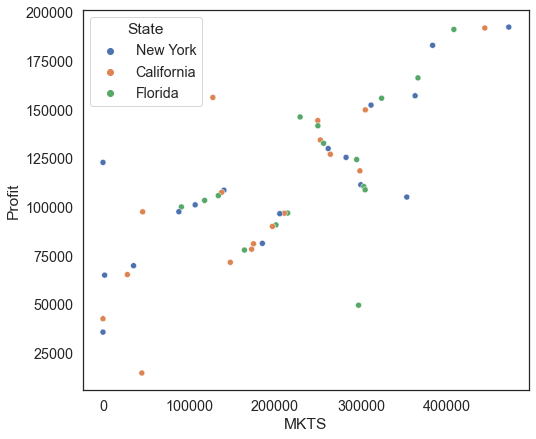

In [145]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='MKTS',y='Profit',data=profit_df,hue='State')

- <font color = 'teal'><b>Convering the categorical data into numerical values</b></font>

In [146]:
profit_df.replace({"State":{"New York":0,"California":1,"Florida":2}},inplace=True)
profit_df.head()

,RD,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


- <font color = 'teal'><b>Separating the data into target and independent variables</b></font>

## Model Building

In [147]:
model=smf.ols("Profit~RD+ADM+MKTS", data=profit_df).fit()

In [148]:
# For finding t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept     7.626218
RD           17.846374
ADM          -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
ADM          6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [149]:
#R squared values and R squared adj
(model.rsquared,model.rsquared_adj) 

(0.9507459940683246, 0.9475337762901719)

In [150]:
 # Checking Administration p_value individually
ml_A = smf.ols("Profit~ADM", data = profit_df).fit() 
print(ml_A.tvalues, '\n', ml_A.pvalues) 

Intercept    3.040044
ADM          1.419493
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [151]:
 # Checking Administration p_value individually
ml_A = smf.ols("Profit~MKTS", data = profit_df).fit() 
print(ml_A.tvalues, '\n', ml_A.pvalues) 

Intercept    7.808356
MKTS         7.802657
dtype: float64 
 Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64


In [152]:
# Checking both p_value together
ml_AM = smf.ols("Profit~ADM + MKTS", data = profit_df).fit()  
print(ml_AM.tvalues, '\n', ml_AM.pvalues) 

Intercept    1.142741
ADM          2.467779
MKTS         8.281039
dtype: float64 
 Intercept    2.589341e-01
ADM          1.729198e-02
MKTS         9.727245e-11
dtype: float64


## Model Validation Technique

In [153]:
# Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_R = smf.ols("RD~ADM+MKTS",data= profit_df).fit().rsquared
vif_R = 1/(1-rsq_R)

rsq_A = smf.ols("ADM~RD+MKTS",data=profit_df).fit().rsquared
vif_A = 1/(1-rsq_A)

rsq_M = smf.ols("MKTS~RD+ADM",data=profit_df).fit().rsquared
vif_M = 1/(1-rsq_M)

# Putting the values in Dataframe format
d1={'Variables':['RD','ADM','MKTS'],'VIF':[vif_R,vif_A,vif_M]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,VIF
0,RD,2.468903
1,ADM,1.175091
2,MKTS,2.326773


- <font color = 'teal'>The Variance inflation value is less than 20 for all variables so there is no collinearity problem.</font>

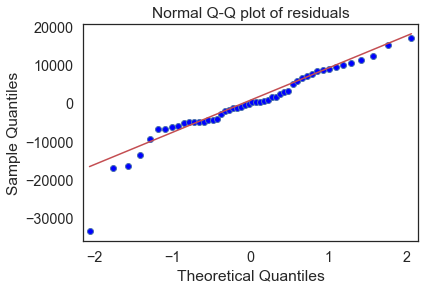

In [154]:
# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot)

qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [155]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

### Residual Plot for Homoscedasticity

In [156]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()


- <font color = 'teal'><b>for calculating z vaues using the formula:z = (x - mu)/sigma</b></font>

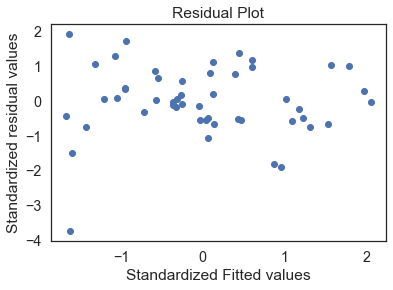

In [157]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

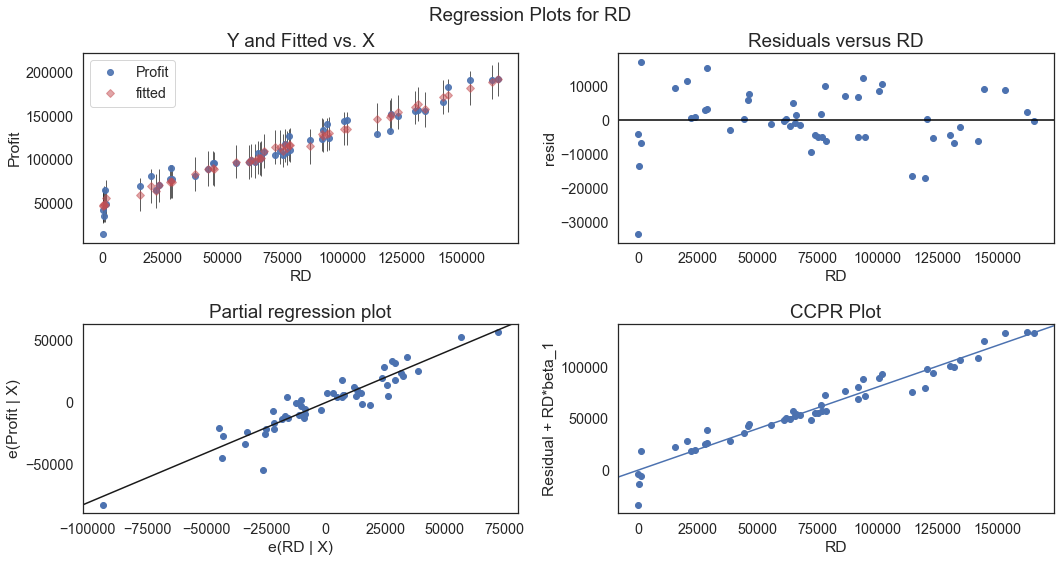

In [158]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

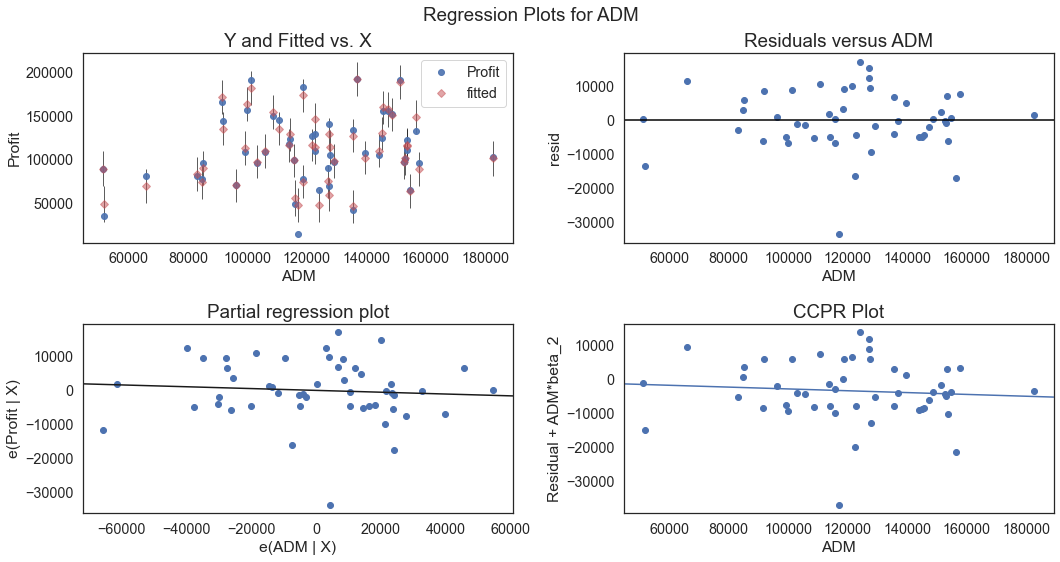

In [159]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADM',fig=fig)
plt.show()

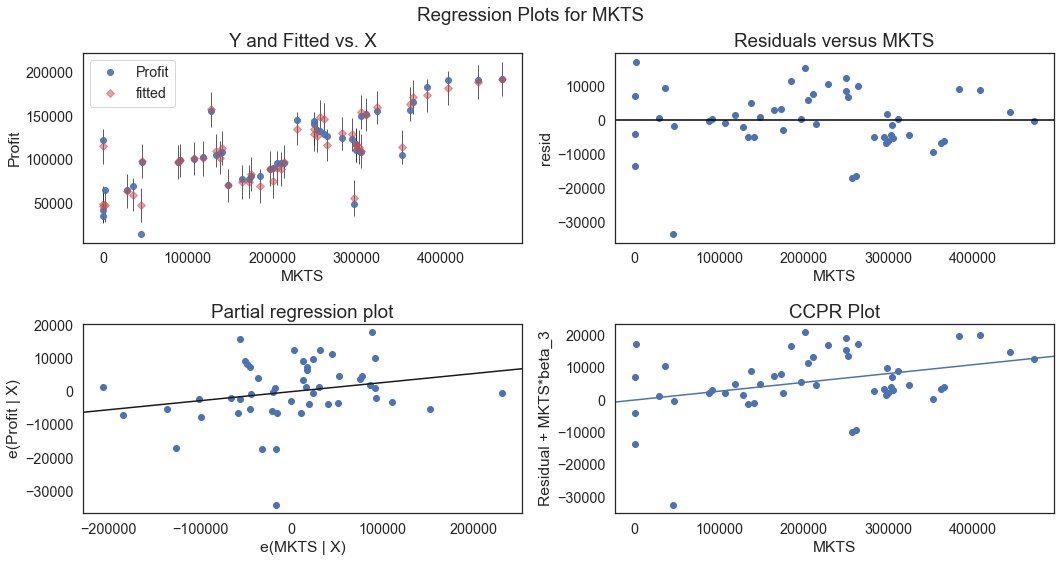

In [160]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

## Model Deletion Diagnostics

### Detecting Influencers/Outliers

### Cook’s Distance

In [161]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

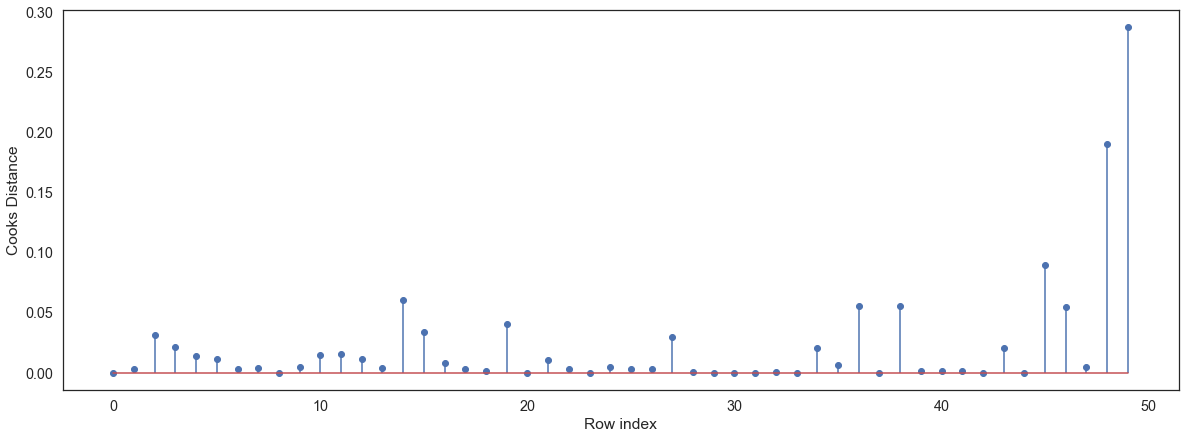

In [162]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(profit_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

- <font color = 'teal'><b>If Cook's distance > 1, then it's an outlier.</b></font>

In [163]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

### High Influence points

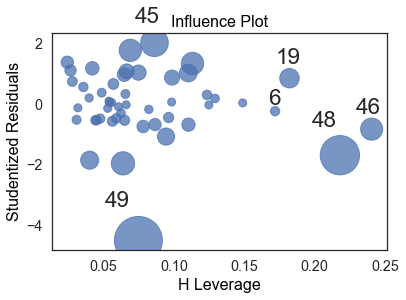

In [164]:
influence_plot(model)
plt.show()

In [166]:
k = profit_df.shape[1]
n = profit_df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [169]:
profit_df[profit_df.index.isin([49])] 

,RD,ADM,MKTS,State,Profit
49,0.0,116983.8,45173.06,1,14681.4


- <font color = 'teal'><b> Since the value is less than 1, we can stop the diagnostic process and finalize the model </b></font>

<AxesSubplot:>

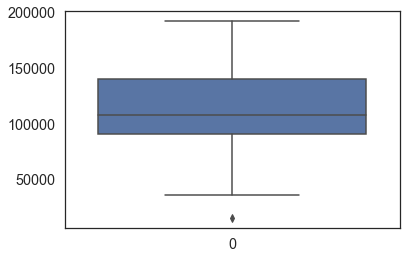

In [170]:
sns.boxplot(data=profit_df['Profit'])

- <font color = 'teal'><b>Finding ouliers and making a efficient model</b></font>

In [171]:
filter_data=profit_df[(profit_df['Profit']<20000)]
filter_data

,RD,ADM,MKTS,State,Profit
49,0.0,116983.8,45173.06,1,14681.4


In [187]:
profit_df_final1=profit_df.drop(profit_df.index[[49]],axis=0).reset_index(drop=True)
profit_df_final1.tail()

,RD,ADM,MKTS,State,Profit
44,22177.74,154806.14,28334.72,1,65200.33
45,1000.23,124153.04,1903.93,0,64926.08
46,1315.46,115816.21,297114.46,2,49490.75
47,0.00,135426.92,0.00,1,42559.73
48,542.05,51743.15,0.00,0,35673.41


In [177]:
profit_df_final=smf.ols("Profit~RD+ADM+MKTS",data=profit_df_final).fit()

In [180]:
(profit_df_final.rsquared,profit_df_final.aic)

(0.9613162435129847, 1020.5652974526367)

## Model Prediction

In [181]:
# New data for prediction
new_data=pd.DataFrame({'RD':100000,"ADM":95000,"MKTS":120000},index=[0])
new_data

,RD,ADM,MKTS
0,100000,95000,120000


In [183]:
profit_df_final.predict(new_data)

0    131601.531558
dtype: float64

In [188]:
pred_y=profit_df_final.predict(profit_df_final1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

- <H2><font color = 'teal'>Table containing R^2 value for each model</font></H2>

In [192]:
R_2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,profit_df_final.rsquared]}
table=pd.DataFrame(R_2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


- <h4><font color ='indigo'>Inference : </font><font color = 'teal'> The model has improved by 1% rate of accuracy</font></h4>